# Проект 7. Приоритизация гипотез и анализ результатов A/B теста

## Часть 1. Приоритизация гипотез

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as st
import seaborn as sns

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 100
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Сначала применим фреймворк ICE для приоритизации гипотез.  

ICE рассчитывается как произведение Impact и Confidence, деленное на Efforts.

In [3]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.drop(['Reach','Impact','Confidence','Efforts'], axis=1).sort_values(by='ICE',ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


После применения фрейворка ICE у нас есть лидер - акция, дающая скидку в день рождения.  
При умеренных усилиях акция серьезно влияет на пользователей и есть высокая уверенность, что влияние и усилия оценены адекватно.  
Другие привлекательные варианты: добавление двух новых каналов привлечения трафика и добавление формы подписки на все основные страницы.

Теперь применим фреймворк RICE.

In [4]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.drop(['Reach','Impact','Confidence','Efforts','ICE'], axis=1).sort_values(by='RICE',ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Фреймфорк RICE дает другой результат: явным лидером является добавление подписки на все основные страницы благодаря 100% охвату посетителей магазина.

## Часть 2. Анализ A/B теста

### 1. Предобработка данных

Для начала изучим датасеты.

In [5]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.8+ KB


Очевидно, что нужно поменять формат столбца date.

In [7]:
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.8+ KB


Проверим на всякий случай диапазон значений столбцов.

In [8]:
orders['date'].describe()

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

Есть данные за август 2019 года.

In [9]:
orders['group'].value_counts(dropna=False)

B    640
A    557
Name: group, dtype: int64

In [10]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

Разброс, видимо, впоследствии придется корректировать данные ))  
Но радует, что, по крайней мере, нет отрицательных значений...

In [11]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [13]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.5+ KB


In [14]:
visitors['date'].describe()

count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [15]:
visitors['group'].value_counts(dropna=False)

A    31
B    31
Name: group, dtype: int64

In [16]:
visitors['visitors'].describe()

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

На первый взгляд, с данными все хорошо.  
Приступим к анализу.

### 2. Анализ результатов

Проведем предварительную работу по группировке нужных результатов в датафрейм, где одна строчка - один день теста.

Для начала создадим датасет с количеством посетителей по дням в группе А.

In [17]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head(10)

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756
5,2019-08-06,667
6,2019-08-07,644
7,2019-08-08,610
8,2019-08-09,617
9,2019-08-10,406


Теперь создадим датасет с кумулятивными данными по количеству посетителей по дням.

In [18]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head(10)

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318
5,2019-08-06,3985
6,2019-08-07,4629
7,2019-08-08,5239
8,2019-08-09,5856
9,2019-08-10,6262


Аналогичные операции проделаем для группы B.

In [19]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head(10)

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280
36,2019-08-06,3935
37,2019-08-07,4644
38,2019-08-08,5298
39,2019-08-09,5908
40,2019-08-10,6277


Теперь создадим переменную, в которой сгруппируем по датам информацию о количестве заказов, количестве покупателей и совокупной выручке.

In [20]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId','visitorId','revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : 'nunique', 'visitorId' : 'nunique',  'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'shoppersPerDateA', 'revenuePerDateA']
ordersADaily.head(10)

,date,ordersPerDateA,shoppersPerDateA,revenuePerDateA
0,2019-08-01,24,20,148579
1,2019-08-02,20,19,93822
2,2019-08-03,24,24,112473
3,2019-08-04,16,15,70825
4,2019-08-05,25,25,124218
5,2019-08-06,18,15,48484
6,2019-08-07,18,18,142417
7,2019-08-08,16,16,96279
8,2019-08-09,16,14,188506
9,2019-08-10,16,16,210495


Создадим переменную с кумулятивными данными о количестве заказов и выручке по дням для группы А.

In [21]:
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
ordersACummulative.head(10)

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917
5,2019-08-06,127,598401
6,2019-08-07,145,740818
7,2019-08-08,161,837097
8,2019-08-09,177,1025603
9,2019-08-10,193,1236098


Проделаем аналогичные операции для группы теста B.

In [22]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'shoppersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
ordersBCummulative.head(10)

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995
5,2019-08-06,129,824337
6,2019-08-07,153,1049671
7,2019-08-08,180,1270589
8,2019-08-09,205,1431401
9,2019-08-10,228,1539203


In [23]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

print(data.head(5))

        date  ordersPerDateA  shoppersPerDateA  revenuePerDateA  \
0 2019-08-01              24                20           148579   
1 2019-08-02              20                19            93822   
2 2019-08-03              24                24           112473   
3 2019-08-04              16                15            70825   
4 2019-08-05              25                25           124218   

   ordersPerDateB  shoppersPerDateB  revenuePerDateB  ordersCummulativeA  \
0              21                20           101217                  24   
1              24                23           165531                  44   
2              16                16           114248                  68   
3              17                16           108571                  84   
4              23                23            92428                 109   

   revenueCummulativeA  ordersCummulativeB  revenueCummulativeB  \
0               148579                  21               101217   
1     

Построим график кумулятивной выручки по группам.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


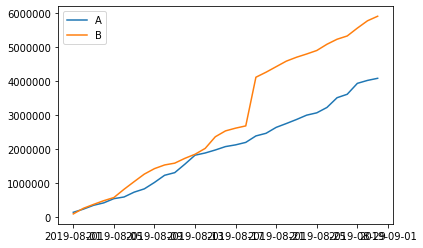

In [24]:
plt.plot(data['date'], data['revenueCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB'], label='B')
plt.legend()

Кажется, что в группе В выручка в целом больше, но смущает резкий скачок во второй половине теста, что может говорить о крупной аномальной покупке.

Теперь построим график кумулятивного среднего чека по группам.

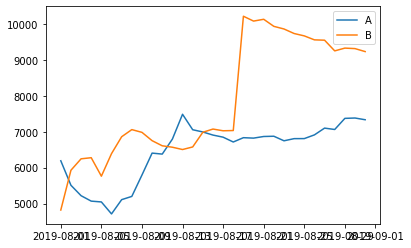

In [25]:
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')
plt.legend()

В какой-то момент наблюдается резкий скачок кумулятивного среднего чека для группы B - очевидно, мы действительно имеем дело с аномально крупной покупкой.

Построим график относительного различия для среднего чека. Добавим горизонтальную ось, проходящую в районе нуля.

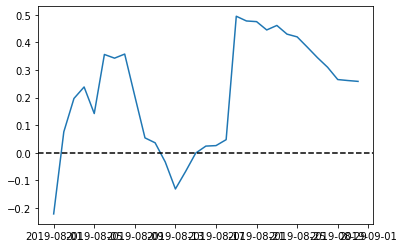

In [26]:
plt.plot(data['date'], 
         (data['revenueCummulativeB']/data['ordersCummulativeB'])
         /(data['revenueCummulativeA']/data['ordersCummulativeA'])-1)
plt.axhline(y=0, color='black', linestyle='--')

Видны резкие колебания, что также свидетельствует об аномальных заказах.

Построим график кумулятивной конверсии по группам.

['2019-08-01', '2019-08-31', 0, 0.04]

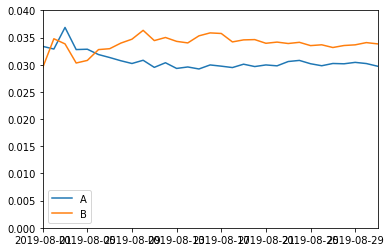

In [27]:
plt.plot(data['date'], data['ordersCummulativeA']/data['visitorsCummulativeA'], label='A')
plt.plot(data['date'], data['ordersCummulativeB']/data['visitorsCummulativeB'], label='B')
plt.legend()
plt.axis(["2019-08-01", '2019-08-31', 0, 0.04])

Различия не очень велики, однако, видно, что конверсия в группе стабилизировалась на уровне примерно на 0,5 п.п. выше, чем в группе А.

Построим график относительного изменения кумулятивной конверсии группы B к группе A.

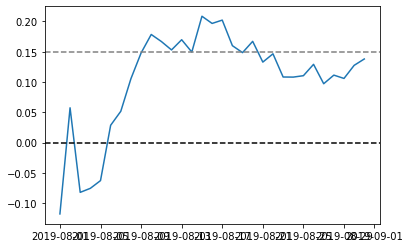

In [28]:
plt.plot(data['date'], 
         (data['ordersCummulativeB']/data['visitorsCummulativeB'])
         /(data['ordersCummulativeA']/data['visitorsCummulativeA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

Кумулятивная конверсия примерно на 15% выше в группе В, и этот показатель стабилизировался.

Теперь построим точечный график количества заказов по пользователям.  
Для начала сгруппируем данные нужным образом.

In [29]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['visitorId','orders']
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Видно, что есть несколько покупателей с большим количеством заказов (более 5).

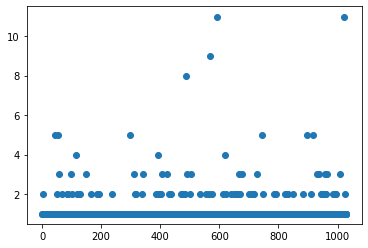

In [30]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

1-2 заказа - это норма, большее количество - скорее редкость, но пока не очень понятно, стоит ли считать это аномалиями.

Посчитаем выборочные перцентили количества заказов на одного пользователя.

In [31]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Посмотрим на долю пользователей, сделавших более двух заказов.

In [32]:
len(ordersByUsers.query('orders > 2'))/len(ordersByUsers)

0.029097963142580018

Менее 3%. Разумно отсеить пользователей, у которых более двух заказов за исследуемый месяц: это аномалии.

Построим точечный график стоимостей заказов.

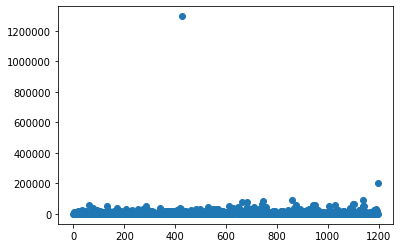

In [33]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

Из-за аномального заказа анализировать график сложно. Зададим оси.

[0, 1200, 0, 200000]

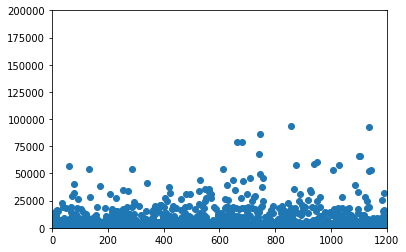

In [34]:
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1200, 0, 200000])

Исходя из этого графика, можно отсекать заказы стоимостью выше 50000 рублей.  Но проверим эту гипотезу статистически.

In [35]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Оптимальная точка отсечения лежит между 30000 и 50000 рублей.  
Выберем 40000 в качестве компромисса.  
Посчитаем, какое количество пользователей мы выкинем суммарно, выбрав в качестве аномальных тех пользователей, которые совершили более двух заказов или совершили заказы на сумму более 40000 рублей.

In [36]:
usersWithManyOrders = pd.concat([ordersByUsers[ordersByUsers['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head())
print(abnormalUsers.shape)

1099    148427295
44      199603092
55      237748145
59      249864742
684     358944393
Name: visitorId, dtype: int64
(55,)


Всего отсечем 55 пользователей.

До того, как отбрасывать аномальных пользователей, проанализируем статистическую значимость различий в конверсии между группами по «сырым» данным.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'orders'].  
В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [37]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersA.head()

,visitorId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [38]:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']
ordersByUsersB.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.  
Тем, кто ничего не заказал, будут соответствовать нули.  
Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [39]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleA.value_counts()

0    18233
1      473
2       17
3        7
4        3
5        2
7        1
Name: orders, dtype: int64

In [40]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
sampleB.value_counts()

0    18330
1      552
2       23
3        5
4        4
6        1
5        1
Name: orders, dtype: int64

Теперь посчитаем критерий Манна-Уитни для того, чтобы выяснить, если значимые различия в конверсии по "сырым" данным.  
Посчитаем также относительный прирост конверсии в группе В.

In [41]:
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


P-value меньше 0,01, поэтому есть все основания отвергнуть нулевую гипотезу об отсутствии отличий в конверсии между группами.  
В группе В визиты успешнее конвертируются в заказы, если судить по "сырым" данным.

Теперь посчитаем статистическую значимость отличий в среднем чеке между группами по "сырым" данным.  
Для этого передадим критерию Mанна-Уитни данные о выручке для двух групп.  
Также посчитаем относительную разницу в среднем чеке между группами.

In [42]:
print("{0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


Несмотря на то, что средний чек в группе В на 26% выше, чем в группе А, статистически значимых отличий не выявляется.

Для анализа "очищенных" данных создадим выборки пользователей, исключив аномальных.

In [43]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleAFiltered.value_counts()

0    18233
1      447
2       12
Name: orders, dtype: int64

Видно, что пропали пользователи с большим количеством заказов.

In [44]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
sampleBFiltered.value_counts()

0    18330
1      534
2       16
Name: orders, dtype: int64

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [45]:
print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.003
0.190


P-value для "очищенной" выборки оказался даже ниже, чем для "сырой".  
Мы можем смело говорить, что конверсия в группе В выше, чем в группе А.  
Посмотрим, как изменится ситуация со средним чеком.

In [46]:
print("{0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.458
0.058


Относительная разница сократилась до 6%, а статистическая значимость отличий упала...  
Следовательно, нет оснований говорить о том, что есть отличия в размере среднего чека между группами.

### Основные выводы

<b> Приоритизация гипотез </b>
1. После применения фрейворка ICE лидером является акция, дающая скидку в день рождения.  
При умеренных усилиях акция серьезно влияет на пользователей, и есть высокая уверенность, что влияние и усилия оценены адекватно.  
2. Однако, минусом акции является ее небольшой охват. Очевидно, что день рождения на коротком промежутке времени есть может быть лишь у небольшой доли пользователей.
В связи с этим фреймворк RICE дает нам основание рекомендовать добавление формы подписки на все основные страницы, поскольку эта акция позволит охватить всех посетителей сайта.

<b> Анализ результатов А/В теста </b>
1. Есть статистически значимые различия по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий: гораздо лучше визиты в заказы конвертируется в группе В.
2. Кумулятивная конверсия стабилизировалась на уровне примерно на 15% выше в группе В.
3. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.  
Решение: остановить тест, признать группу В победителем. Хотя средний чек и не повысился, но он и не уступает группе А, при это конверсия стабильно выше.